# Imports:

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor

# Loading the Data

In [24]:
!wget https://media.githubusercontent.com/media/ulissigroup/F22-06-325/main/f22-06-325/projects/wildfires/data/BlodgettCombinedBlobTable.csv

--2022-10-06 04:19:03--  https://media.githubusercontent.com/media/ulissigroup/F22-06-325/main/f22-06-325/projects/wildfires/data/BlodgettCombinedBlobTable.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7679879 (7.3M) [text/plain]
Saving to: ‘BlodgettCombinedBlobTable.csv.3’

BlodgettCombinedBlo 100%[===================>]   7.32M  --.-KB/s    in 0.1s    

2022-10-06 04:19:04 (50.0 MB/s) - ‘BlodgettCombinedBlobTable.csv.3’ saved [7679879/7679879]



In [25]:
# define column names
col_names = ["Unused tags 1", "BlobID1", "Unused tags 2", 
            "1D Retention Time (min)", "2D Retention Time (sec)", 
            "Peak Height", "Peak Volume", "Peak volume/nearest internal standard peak volume", 
            "Calculated d-alkane retention index", "matched retention index", 
            "Unused tags 3", "Unused tags 4", "Unused tags 5", 
            "BlobID_2", "Filter number", "Unused tags 6", 
            "Mass concentration of compound (ng/m3)"]

# import csv file
df_blobtable = pd.read_csv("BlodgettCombinedBlobTable.csv", names = col_names)

unusedtags = ["Unused tags 1", "Unused tags 2", "Unused tags 3", 
                "Unused tags 4", "Unused tags 5", "Unused tags 6"]

# dropping the NaNs
df_blobtable.replace(np.inf, np.nan, inplace = True)
df_blobtable = df_blobtable.drop(labels = unusedtags, axis = 1)
df_blobtable = df_blobtable.dropna()

# Creating a Binary Representation Column of the Drone's Elevation:
0 if the drone is on the ground, 1 if it is in the air

In [26]:
# create a binary representation of if the drones are elevated or on the ground
binary = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter >= 200:
    binary.append(0)
  else:
    binary.append(1)

# create a new column
df_blobtable['Binary Elevation'] = binary

# Creating an Altitude Column:

In [27]:
# create a new altitude column for if the drones are elevated or on the ground
alt = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter == 1:
    alt.append(50)
  elif filter == 2:
    alt.append(53)
  elif filter == 3:
    alt.append(41)
  elif filter == 4:
    alt.append(14)
  elif filter == 5:
    alt.append(50)
  elif filter == 6:
    alt.append(40)
  elif filter == 7:
    alt.append(32)
  elif filter == 8:
    alt.append(35)
  elif filter == 9:
    alt.append(50)
  elif filter == 10:
    alt.append(20)
  elif filter == 11:
    alt.append(35)
  elif filter == 12:
    alt.append(30)
  elif filter == 13:
    alt.append(20)
  elif filter == 14:
    alt.append(70)
  elif filter == 15:
    alt.append(95)
  elif filter == 16:
    alt.append(100)
  elif filter == 17:
    alt.append(100)
  elif filter == 18:
    alt.append(72)
  elif filter == 19:
    alt.append(70)
  elif filter == 20:
    alt.append(60)
  elif filter == 21:
    alt.append(60)
  elif filter == 22:
    alt.append(60)
  else:
    alt.append(0)

# create a new column
df_blobtable['Altitude'] = alt

# Creating a Plot Column:

In [28]:
# create a new plot number column 
plot = []

# convert the column to an array
filters = np.array(df_blobtable['Filter number'])

for filter in filters:
  if filter == 1:
    plot.append(340)
  elif filter == 2:
    plot.append(340)
  elif filter == 3:
    plot.append(340)
  elif filter == 4:
    plot.append(340)
  elif filter == 5:
    plot.append(60)
  elif filter == 6:
    plot.append(60)
  elif filter == 7:
    plot.append(60)
  elif filter == 8:
    plot.append(60)
  elif filter == 9:
    plot.append(0)
  elif filter == 10:
    plot.append(60)
  elif filter == 11:
    plot.append(60)
  elif filter == 12:
    plot.append(60)
  elif filter == 13:
    plot.append(60)
  elif filter == 14:
    plot.append(400)
  elif filter == 15:
    plot.append(400)
  elif filter == 16:
    plot.append(400)
  elif filter == 17:
    plot.append(400)
  elif filter == 18:
    plot.append(400)
  elif filter == 19:
    plot.append(400)
  elif filter == 20:
    plot.append(400)
  elif filter == 21:
    plot.append(400)
  elif filter == 22:
    plot.append(400)
  elif filter == 201:
    plot.append(340)
  elif filter == 202:
    plot.append(340)
  elif filter == 203:
    plot.append(340)
  elif filter == 203:
    plot.append(340)
  elif filter == 204:
    plot.append(340)
  elif filter == 205:
    plot.append(340)
  elif filter == 212:
    plot.append(340)
  elif filter == 207:
    plot.append(340)
  elif filter == 208:
    plot.append(340)
  elif filter == 209:
    plot.append(340)
  elif filter == 210:
    plot.append(340)
  elif filter == 211:
    plot.append(340)
  elif filter == 213:
    plot.append(60)
  elif filter == 214:
    plot.append(60)
  elif filter == 215:
    plot.append(60)
  elif filter == 216:
    plot.append(60)
  elif filter == 217:
    plot.append(60)
  elif filter == 218:
    plot.append(60)
  elif filter == 219:
    plot.append(60)
  elif filter == 220:
    plot.append(60)
  elif filter == 221:
    plot.append(60)
  elif filter == 222:
    plot.append(60)
  elif filter == 223:
    plot.append(60)
  elif filter == 224:
    plot.append(60)
  elif filter == 225:
    plot.append(400)
  elif filter == 226:
    plot.append(400)
  elif filter == 227:
    plot.append(400)
  elif filter == 228:
    plot.append(400)
  elif filter == 229:
    plot.append(400)
  elif filter == 230:
    plot.append(400)
  elif filter == 231:
    plot.append(400)
  elif filter == 232:
    plot.append(400)
  elif filter == 233:
    plot.append(400)
  elif filter == 234:
    plot.append(400)
  elif filter == 235:
    plot.append(400)
  elif filter == 236:
    plot.append(400)
  elif filter == 237:
    plot.append(400)
  else:
    plot.append(0)  # there are filter numbers that don't have one of the above filter numbers
    
# create a new column
df_blobtable['Plot'] = plot

# Original Data Train/Val/Test Split
This split is performed on the df_blobtable without any columns from other data sets.

In [29]:
# creating the train/val/test split 
# 80/10/10
# removing the columns used to determine the elevation of the drone
x = df_blobtable.drop(['Altitude', 'Binary Elevation', 'Filter number'], axis = 1)
y = df_blobtable[('Altitude')]

# performing a 80/10/10 split
x_train, x_testval, y_train, y_testval, = train_test_split(
x, y, train_size = 8/10, random_state = 42, shuffle = True)

x_val, x_test, y_val, y_test = train_test_split(
x_testval, y_testval, test_size = 5/10, random_state = 42, shuffle = True)

,BlobID1,1D Retention Time (min),2D Retention Time (sec),Peak Height,Peak Volume,Peak volume/nearest internal standard peak volume,Calculated d-alkane retention index,matched retention index,BlobID_2,Mass concentration of compound (ng/m3),Plot
0,181,40.608204,1.026330,105.022469,1263.347317,1.000000,1652.439024,1653.0,0,0.000000,340
1,1553,40.037744,1.414941,31.052483,479.394947,1.000000,1634.146341,1633.0,0,0.000000,340
2,62,63.502673,1.135938,8.124082,135.140907,1.000000,2524.561404,2520.0,0,0.000000,340
3,776,27.259436,1.355154,281.546460,3376.619472,1.000000,1263.387978,1277.0,0,0.000000,340
4,61,32.013271,0.328824,118.679093,946.665804,1.000000,1400.000000,1800.0,0,0.000000,340
...,...,...,...,...,...,...,...,...,...,...,...
44635,2811,40.312724,0.981316,4.096229,57.013969,0.019236,1644.171779,1646.0,176,0.783983,0
44636,2812,40.274506,1.131518,155.203347,1839.028248,0.620461,1642.944785,1642.0,176,160.803335,0
44637,2813,40.045199,0.891195,201.872901,2958.995344,0.998322,1635.582822,1637.0,176,24.473803,0
44638,2818,45.892543,0.931249,6.134070,124.792845,0.043840,1825.675676,1824.0,176,1.330786,0


# Models:

Logistic Regression Model to Predict Altitudes:

The validation MAE for a simple logistic regression model is: 16.46


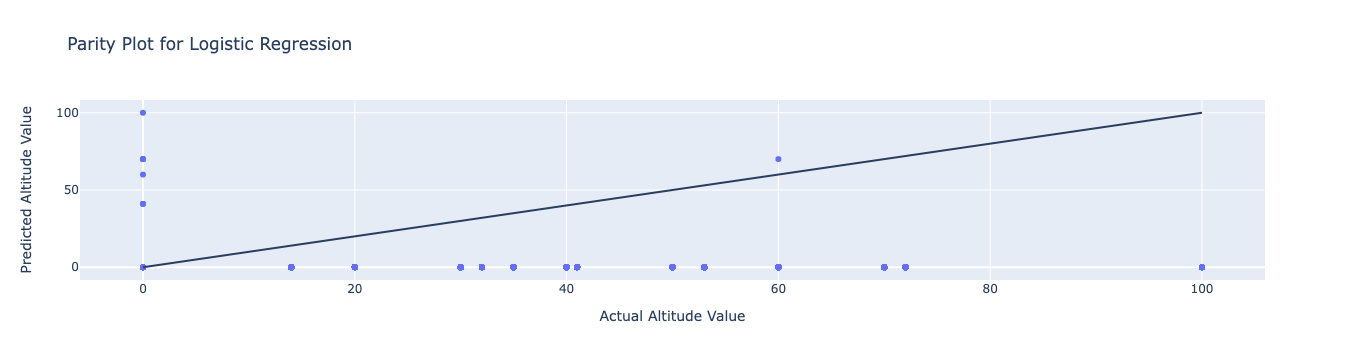

In [30]:
# simple logistic regression
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression(penalty = "none"))
logistic_regression.fit(x_train, y_train)
log_mae = mean_absolute_error(y_val, logistic_regression.predict(x_val))
print('The validation MAE for a simple logistic regression model is:', round(log_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = logistic_regression.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Altitude Value")
fig.update_yaxes(title_text = "Predicted Altitude Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Logistic Regression', autosize = True)
fig.show()

Logistic Regression Model with 3rd Order Polynomial Features to Predict Altitudes:

The validation MAE for a logistic regression model with 3rd order features is: 16.313


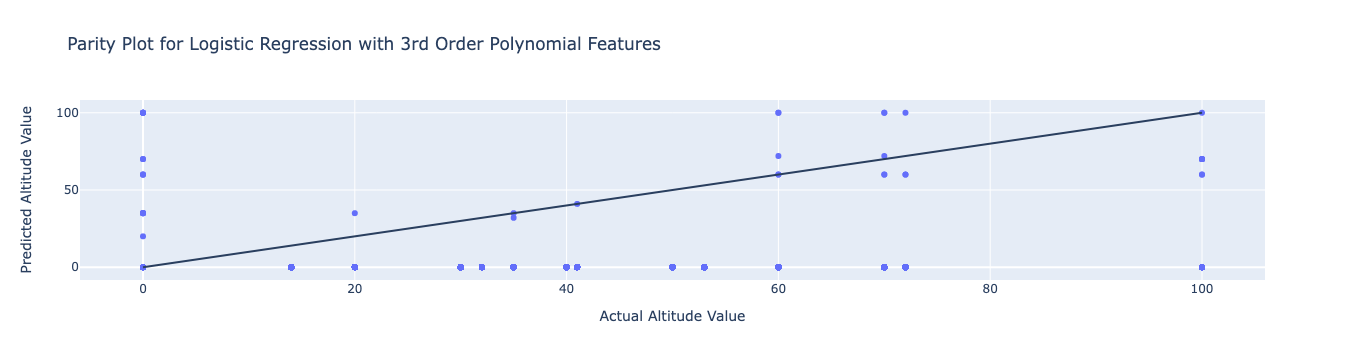

In [54]:
log_regress_poly = make_pipeline(PolynomialFeatures(3), StandardScaler(), LogisticRegression(penalty = "none"))
log_regress_poly.fit(x_train, y_train)
log_mae_poly = mean_absolute_error(y_val, log_regress_poly.predict(x_val))
print('The validation MAE for a logistic regression model with 3rd order features is:', round(log_mae_poly, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = log_regress_poly.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Altitude Value")
fig.update_yaxes(title_text = "Predicted Altitude Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Logistic Regression with 3rd Order Polynomial Features', autosize = True)
fig.show()

Logistic Regression Model with 3rd Order Polynomial Features and Regularization to Predict Altitudes:

The validation MAE for a logistic regression model with 3rd order features is: 16.351


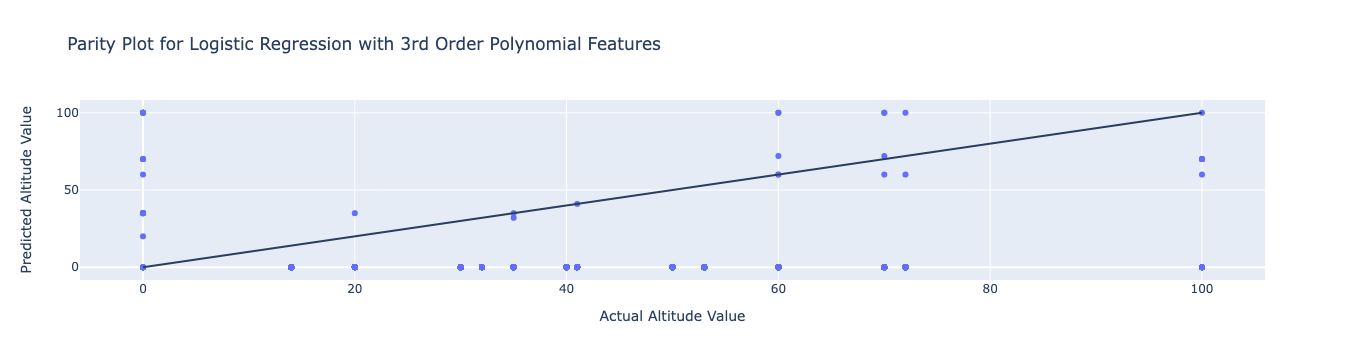

In [60]:
log_regress_reg = make_pipeline(PolynomialFeatures(3), StandardScaler(), LogisticRegression(penalty = 'l2', C = 1))
log_regress_reg.fit(x_train, y_train)
log_mae_reg = mean_absolute_error(y_val, log_regress_reg.predict(x_val))
print('The validation MAE for a logistic regression model with 3rd order features and regularization is:', round(log_mae_reg, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = log_regress_reg.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Altitude Value")
fig.update_yaxes(title_text = "Predicted Altitude Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Logistic Regression with 3rd Order Polynomial Features and Regularization', autosize = True)
fig.show()

Default Decision Tree Regressor to Predict Altitudes:

The MAE for the default decision tree regressor is: 15.22


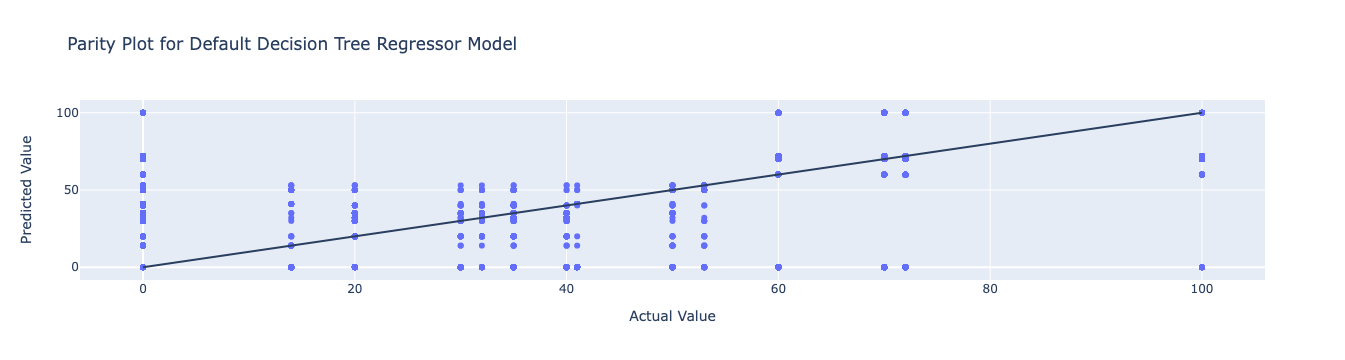

In [31]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

dt_mae = mean_absolute_error(y_val, dt_model.predict(x_val))
print('The MAE for the default decision tree regressor is:', round(dt_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = dt_model.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max(),)

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Default Decision Tree Regressor Model', autosize = True)
fig.show()

Decision Tree Regressor with Standard Scaler to Predict Altitudes:

The MAE for the decision tree regressor with standard scaler is: 14.995


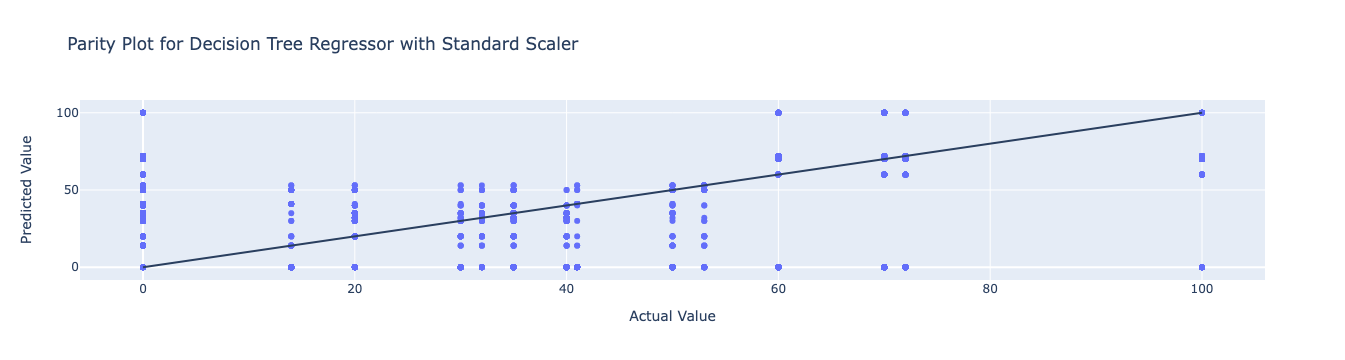

In [50]:
dtp_model = DecisionTreeRegressor()
dtp_model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
dtp_model.fit(x_train, y_train)

dtp_mae = mean_absolute_error(y_val, dtp_model.predict(x_val))
print('The MAE for the decision tree regressor with standard scaler is:', round(dtp_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = dtp_model.predict(x_val), mode = "markers")])

fig.add_shape(type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max(),)

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for Decision Tree Regressor with Standard Scaler', autosize = True)
fig.show()

# Important Features:
It can be seen that the peak volume/nearest internal standard peak volume, the mass concentration of compound (ng/m3), and the plot are what contribute the most to the decision tree regressor model.

In [33]:
importances = dt_model.feature_importances_

# code from: https://stackoverflow.com/questions/23900080/how-are-feature-importances-ordered-in-scikit-learns-randomforestregressor
sorted(zip(x, importances), reverse = True)

[('matched retention index', 0.030270567407312352),
 ('Plot', 0.12857123469627527),
 ('Peak volume/nearest internal standard peak volume', 0.1302777623367681),
 ('Peak Volume', 0.12005140808935633),
 ('Peak Height', 0.09293987420766894),
 ('Mass concentration of compound (ng/m3)', 0.1498843749532239),
 ('Calculated d-alkane retention index', 0.04687248102966275),
 ('BlobID_2', 0.04119047256526701),
 ('BlobID1', 0.07478803743270718),
 ('2D Retention Time (sec)', 0.11272022858878532),
 ('1D Retention Time (min)', 0.0724335586929729)]

In [53]:
# extracts the decision tree regressor from the pipeline
# code from: https://stackoverflow.com/questions/38787612/how-to-extract-feature-importances-from-an-sklearn-pipeline
importances = dtp_model.steps[1][1].feature_importances_

# code from: https://stackoverflow.com/questions/23900080/how-are-feature-importances-ordered-in-scikit-learns-randomforestregressor
sorted(zip(x, importances), reverse = True)

[('matched retention index', 0.035291577375136),
 ('Plot', 0.1285228292836995),
 ('Peak volume/nearest internal standard peak volume', 0.13189604860905388),
 ('Peak Volume', 0.12243020431249631),
 ('Peak Height', 0.08909005280478272),
 ('Mass concentration of compound (ng/m3)', 0.1505582307508628),
 ('Calculated d-alkane retention index', 0.05194412910801846),
 ('BlobID_2', 0.041197553754780084),
 ('BlobID1', 0.07669716614806502),
 ('2D Retention Time (sec)', 0.10924344728550207),
 ('1D Retention Time (min)', 0.06312876056760305)]

LASSO Model to Predict Altitudes:

The MAE for a LASSO regression is: 21.398


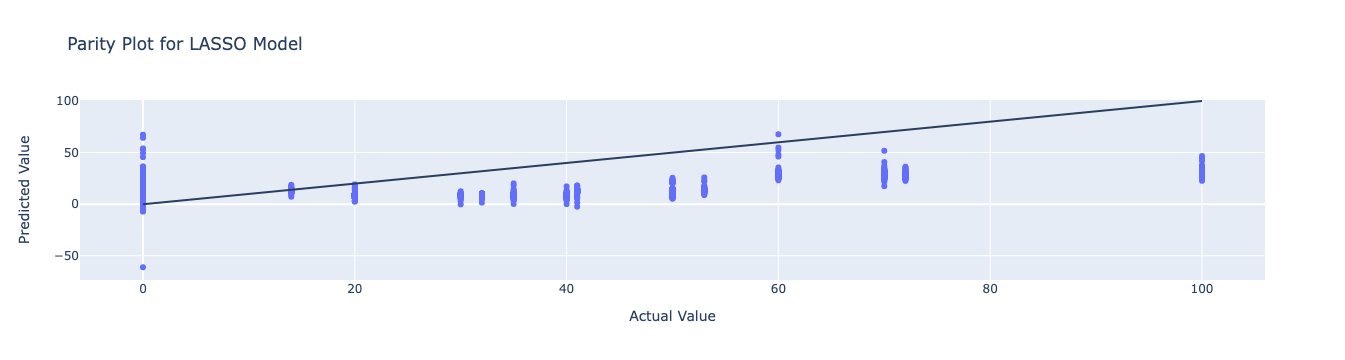

In [71]:
simplefilter("ignore", category = ConvergenceWarning)

# linear Regression fit using sklearn
l_model = Lasso()
l_model = make_pipeline(PolynomialFeatures(2), Lasso(fit_intercept = False))
l_model.fit(x_train, y_train)
l_mae = mean_absolute_error(y_val, l_model.predict(x_val))
print('The MAE for a LASSO regression is:', round(l_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = l_model.predict(x_val), mode = "markers")])

fig.add_shape(
    type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for LASSO Model', autosize = True)
fig.show()

KNeighbors to Predict Altitudes:

The MAE for KNeighbors with 5 neighbors and Standard Scaler is: 15.586


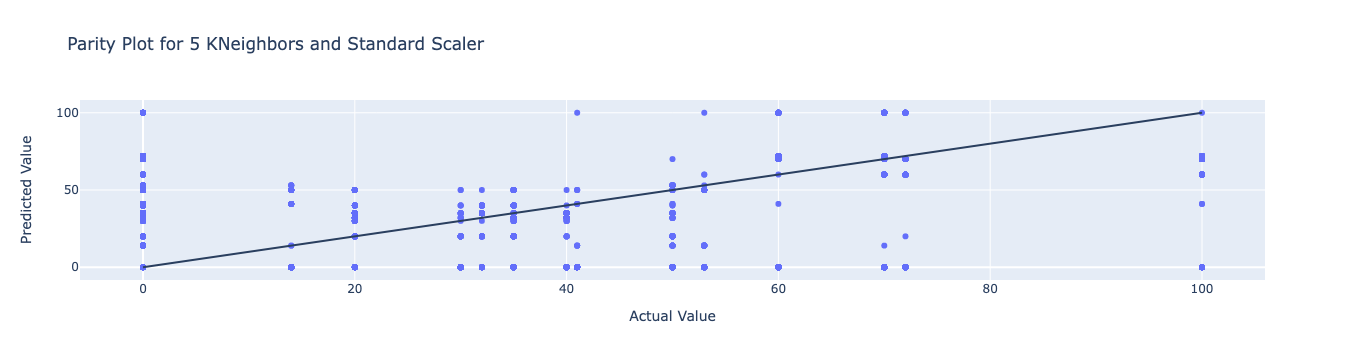

In [78]:
model_k = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 1))
model_k.fit(x_train, y_train)
k_mae = mean_absolute_error(y_val, model_k.predict(x_val))
print('The MAE for KNeighbors with 5 neighbors and Standard Scaler is:', round(k_mae, 3))

# making the parity plot
fig = go.Figure(data = [go.Scatter(x = y_val, y = model_k.predict(x_val), mode = "markers")])

fig.add_shape(
    type = "line", x0 = y_val.min(), y0 = y_val.min(), x1 = y_val.max(), y1 = y_val.max())

fig.update_xaxes(title_text = "Actual Value")
fig.update_yaxes(title_text = "Predicted Value")

# set the plot size
fig.update_layout(title = 'Parity Plot for 5 KNeighbors and Standard Scaler', autosize = True)
fig.show()